In [10]:
import os 
import pandas as pd
import numpy
import matplotlib.pyplot as plt
import json

In [11]:
## SELECT SESSION FOR VISUALIZATION
session = 38

In [12]:
f = open("./logs/medical_ssd_resnet50.log")
lines = f.readlines()
f.close()

In [13]:
temp_log_dicts=[]
for i,line in enumerate(lines):
    try:
        curr_dict = json.loads(line)
        temp_log_dicts.append(curr_dict)
    except:
        print(line + ' is on line: ' + str(i))

}
 is on line: 15067
77}
 is on line: 22057
62}
 is on line: 24536
8805}
 is on line: 24601
802}
 is on line: 24640
4}
 is on line: 24646
73}
 is on line: 24910
1}
 is on line: 25218
8}
 is on line: 25566
14}
 is on line: 25596

 is on line: 25735
{"type": "train", "session": 32, "data": {"loss": {"B": 1.9801, "M": 1.64212, "C": 1.67871, "S": 0.04905, "T": 5.34999}, "epoch": 0, "iter": 466, "lr": 0.0009388, "elapsed": 0.3775656223297119}, "time": 1700349475.78624{"type": "train", "session": 30, "data": {"loss": {"B": 1.85592, "M": 1.13194, "C": 1.72716, "S": 0.0407, "T": 4.75572}, "epoch": 0, "iter": 932, "lr": 0.001, "elapsed": 0.356581449508667}, "time": 1700349475.8054795}
 is on line: 25812

 is on line: 26020

 is on line: 26274
4}
 is on line: 26371

 is on line: 26464
}
 is on line: 26494
5}
 is on line: 26633
}
 is on line: 26677

 is on line: 26944
}
 is on line: 27336

 is on line: 27380
}
 is on line: 27612

 is on line: 27622
195}
 is on line: 27900

 is on line: 27987
}
 i

In [14]:
#check that log lines are inside
print(len(temp_log_dicts))

50687


In [15]:
#create pandas dataframes from log file
log_dicts = []
for i,log_dict in enumerate(temp_log_dicts):
    if log_dict['session'] == session:
        log_dicts.append(log_dict)


In [16]:
print(len(log_dicts))
print(log_dicts[1])

4978
{'type': 'train', 'session': 38, 'data': {'loss': {'B': 4.38862, 'M': 4.57785, 'C': 14.55171, 'S': 1.15285, 'T': 24.67102}, 'epoch': 0, 'iter': 0, 'lr': 0.0001, 'elapsed': 8.003800392150879}, 'time': 1700484119.4113293}


In [28]:
# initialize dataframes and fill them, im sure theres a better way for this but whatever
# Loss Key:
        #  - B: Box Localization Loss
        #  - C: Class Confidence Loss
        #  - M: Mask Loss
        #  - P: Prototype Loss
        #  - D: Coefficient Diversity Loss
        #  - E: Class Existence Loss
        #  - S: Semantic Segmentation Loss
train_dict = {}
train_dict['epoch'] = []
train_dict['iter'] = []
train_dict['total_loss'] = []
train_dict['bbox_loss'] = []
train_dict['mask_loss'] = [] 
val_dict = {}
val_dict['epoch'] = []
val_dict['iter'] = []
val_dict['total_loss'] = []
val_dict['bbox_loss'] = []
val_dict['mask_loss'] = []

for log_dict in log_dicts:
    if log_dict['type'] in ["train"]:
        train_dict['epoch'].append(log_dict['data']['epoch'])
        train_dict['iter'].append(log_dict['data']['iter'])
        train_dict['total_loss'].append(log_dict['data']['loss']['T'])
        train_dict['bbox_loss'].append(log_dict['data']['loss']['B'])
        train_dict['mask_loss'].append(log_dict['data']['loss']['M'])
    elif log_dict['type'] in ['val-loss']:
        val_dict['epoch'].append(log_dict['data']['epoch'])
        val_dict['iter'].append(log_dict['data']['iter'])
        val_dict['total_loss'].append(log_dict['data']['val_loss']['T'])
        val_dict['bbox_loss'].append(log_dict['data']['val_loss']['B'])
        val_dict['mask_loss'].append(log_dict['data']['val_loss']['M'])

train_pd = pd.DataFrame.from_dict(train_dict)
val_pd = pd.DataFrame.from_dict(val_dict)
print(train_pd)

     epoch  iter  total_loss  bbox_loss  mask_loss
0        0     0    24.67102    4.38862    4.57785
1        0     1    24.70968    6.31753    4.79572
2        0     2    21.18602    5.60063    4.83710
3        0     3    18.78391    5.13666    4.09958
4        0     4    19.48969    6.22814    4.20514
..     ...   ...         ...        ...        ...
331      0   331     7.78534    2.94409    2.32650
332      0   332     8.88962    3.61426    2.68819
333      0   333     7.63377    2.74774    2.55968
334      0   334     6.94533    3.02891    1.82943
335      0   335     6.06822    2.17862    1.73273

[336 rows x 5 columns]


In [29]:
print(val_pd)

      epoch  iter  total_loss  bbox_loss  mask_loss
0         0     0    10.10623    4.65463    2.90715
1         0     1    10.28789    4.49305    2.98654
2         0     2    10.42003    4.62026    3.04599
3         0     3    10.33919    4.40705    2.98631
4         0     4     9.96381    4.07381    2.97247
...     ...   ...         ...        ...        ...
4636      0  1542    11.99840    3.29640    1.92187
4637      0  1543    12.04620    3.12242    1.87357
4638      0  1544    10.32751    1.48485    2.12266
4639      0  1545    10.37148    1.32145    2.24443
4640      0  1546    10.58192    1.58828    2.20522

[4641 rows x 5 columns]


In [30]:
loss_array = train_pd['total_loss'].to_numpy()
iterations_array = train_pd['iter'].to_numpy()
print(len(loss_array))
print(len(iterations_array))
val_loss_array = val_pd['total_loss'].to_numpy()
val_iterations_array = val_pd['iter'].to_numpy()
print(len(val_loss_array))
print(len(val_iterations_array))

336
336
4641
4641


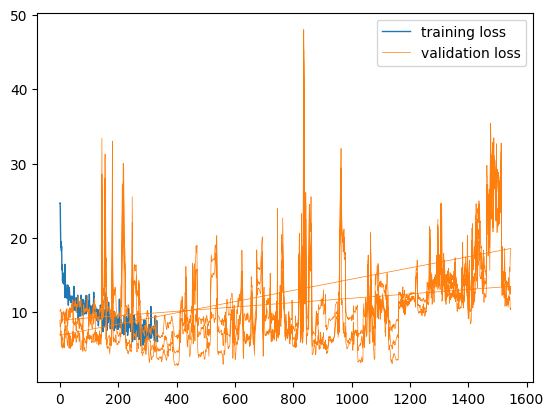

In [35]:

plt.plot(iterations_array, loss_array, linewidth=1, label='training loss')
plt.plot(val_iterations_array, val_loss_array, linewidth=0.5, label='validation loss')
plt.legend()
plt.show()